# MTL in Detection of Emotion, Toxicity Classification

### 1. Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch_directml as td
%matplotlib inline


In [3]:
def select_device(device=''):
    if device.lower() == 'cuda':
        if not torch.cuda.is_available():
            print ("torch.cuda not available")
            return torch.device('cpu')    
        else:
            return torch.device('cuda:0')
    if device.lower() == 'dml':
        return td.device(td.default_device())
    else:
        return torch.device('cpu')

In [4]:
device = select_device('dml')

#### 1.1 Import Dataset

In [5]:
name_8k_dataset = "Almost Balance_Dataset_ChattyTicket.csv"

In [6]:
df = pd.read_csv(f'../dataset/{name_8k_dataset}', encoding='utf-8')


In [7]:
# check for any null values
print(df.isnull().sum())

username    3
chat        0
emotion     0
toxicity    0
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7328 entries, 0 to 7327
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  7325 non-null   object
 1   chat      7328 non-null   object
 2   emotion   7328 non-null   object
 3   toxicity  7328 non-null   object
dtypes: object(4)
memory usage: 229.1+ KB


In [9]:
df.head()

,username,chat,emotion,toxicity
0,Jape,-140,neutral,not toxic
1,Shizuwu,5,neutral,not toxic
2,neverland,80,neutral,not toxic
3,LikMaB#alls,88,neutral,not toxic
4,Iskiri,120,neutral,not toxic


In [10]:
df = df.sample(frac=1)

In [11]:
df.reset_index(drop=True, inplace=True)

In [12]:
df.tail()

,username,chat,emotion,toxicity
7323,Nvrm #2542,nt,surprise,not toxic
7324,PandaBaby #BABY,our <agent> is better,happy,not toxic
7325,mustard #tin,ggs,sad,not toxic
7326,Primo #kari2,"""Do you know how to play?""",disgust,gamesplaining
7327,Rin#Luts,Hope yall had a good day,happy,not toxic


In [13]:
df.head()

,username,chat,emotion,toxicity
0,zineeey#777,Go die stupid bitch,anger,Multiple Discrimination
1,Jape,Xd,neutral,not toxic
2,Naoki #0704,you can do it again,sad,sarcasm
3,NissanSilvia S15 #Panda,ang bano naman,disgust,cyberbullying
4,DanaSoslar#abbie,nice game,happy,not toxic


#### 1.2 Check all the classes

`toxicity`

In [14]:
df['toxicity'].value_counts()

toxicity
not toxic                         2692
cyberbullying                     1219
sarcasm                           1212
Cyberbullying                      635
Gameplay Experience Complaints     545
Multiple Discrimination            409
gamesplaining                      256
Blaming others                     236
blaming others                     122
Sarcasm                              2
Name: count, dtype: int64

In [15]:
df['toxicity']= df['toxicity'].apply(lambda x: x.lower())

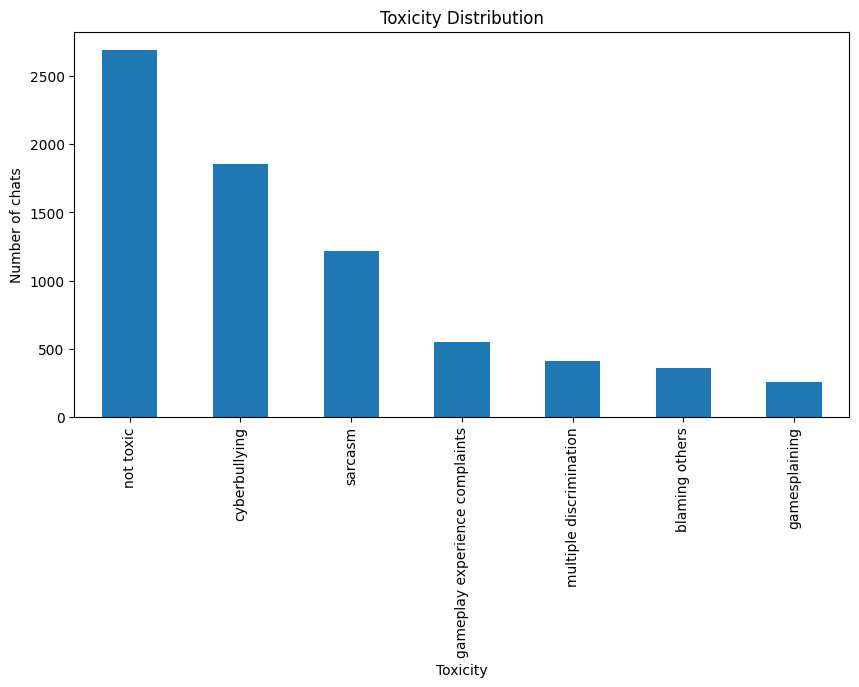

In [16]:
# bar plot 
plt.figure(figsize=(10,5))
df['toxicity'].value_counts().plot(kind='bar')
plt.ylabel('Number of chats')
plt.xlabel('Toxicity')
plt.title('Toxicity Distribution')
plt.show()

`emotion / sentiment`

In [17]:
df['emotion'].value_counts()

emotion
happy       1956
anger       1920
disgust     1324
neutral      931
sad          896
surprise     301
Name: count, dtype: int64

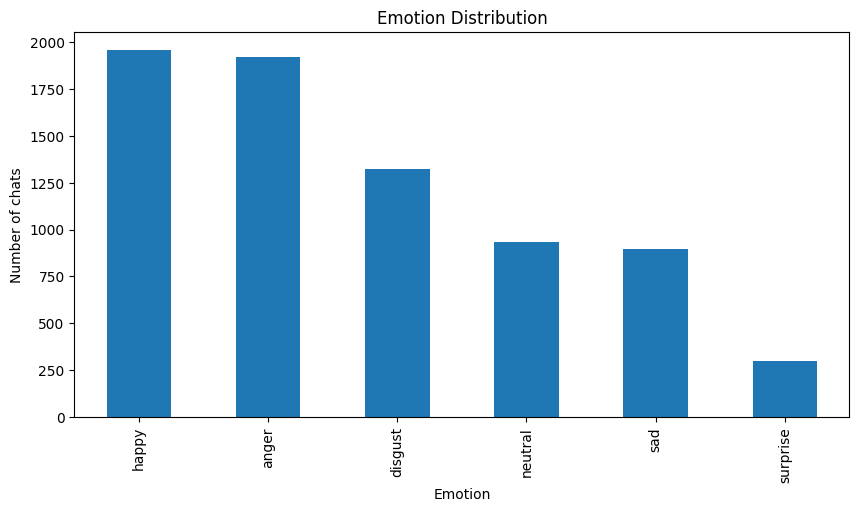

In [18]:
# bar plot 
plt.figure(figsize=(10,5))
df['emotion'].value_counts().plot(kind='bar')
plt.ylabel('Number of chats')
plt.xlabel('Emotion')
plt.title('Emotion Distribution')
plt.show()

Test dataset from the survey and real chat

In [19]:
df2 = pd.read_csv('../dataset/Almost Balance_unrevised_Dataset_ChattyTicket.csv')

In [20]:
df2.head()

,username,chat,emotion,toxicity
0,GT BLACKSHEEP XIE,mb,sad,not toxic
1,GT BLACKSHEEP XIE,mb kj,sad,not toxic
2,GT BLACKSHEEP XIE,wp,happy,not toxic
3,GT BLACKSHEEP XIE,hahahaahaa,happy,not toxic
4,GT BLACKSHEEP XIE,noice HAHAHHAHAHA,happy,not toxic


In [21]:
df2['toxicity']= df2['toxicity'].apply(lambda x: x.lower())

In [22]:
df2['emotion'].value_counts()

emotion
anger       192
happy       184
disgust     134
neutral     120
sad         108
surprise     21
Name: count, dtype: int64

In [23]:
df2['toxicity'].value_counts()

toxicity
not toxic                         407
cyberbullying                     143
sarcasm                            90
gameplay experience complaints     65
multiple discrimination            31
blaming others                     22
gamesplaining                       1
Name: count, dtype: int64

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  759 non-null    object
 1   chat      759 non-null    object
 2   emotion   759 non-null    object
 3   toxicity  759 non-null    object
dtypes: object(4)
memory usage: 23.8+ KB


In [25]:
df2['emotion'].value_counts()

emotion
anger       192
happy       184
disgust     134
neutral     120
sad         108
surprise     21
Name: count, dtype: int64

In [26]:
# compute the test set
print("Total Test set",(7928*0.11)+759)

Total Test set 1631.08


Getting the portion data from the big dataset

In [27]:
df = df.sample(frac=1)

In [28]:
from sklearn.model_selection import train_test_split
train, test =  train_test_split(df, test_size=0.11)

In [29]:
train.to_pickle('../dataset/preprocessed_df_train.pkl')

Combining the two datasets

In [30]:
test_ = pd.concat([df2, test])

In [31]:
df2['emotion'].value_counts()

emotion
anger       192
happy       184
disgust     134
neutral     120
sad         108
surprise     21
Name: count, dtype: int64

In [32]:
train['toxicity'].value_counts()

toxicity
not toxic                         2396
cyberbullying                     1649
sarcasm                           1087
gameplay experience complaints     497
multiple discrimination            356
blaming others                     302
gamesplaining                      234
Name: count, dtype: int64

In [33]:
test_['toxicity'].value_counts()

toxicity
not toxic                         703
cyberbullying                     348
sarcasm                           217
gameplay experience complaints    113
multiple discrimination            84
blaming others                     78
gamesplaining                      23
Name: count, dtype: int64

In [34]:
test_['emotion'].value_counts()

emotion
anger       402
happy       382
disgust     297
neutral     216
sad         213
surprise     56
Name: count, dtype: int64

In [35]:
# check for any null values
print(test_.isnull().sum())

username    0
chat        0
emotion     0
toxicity    0
dtype: int64


In [36]:
# export train set
test_.to_pickle('../dataset/preprocessed_df_test.pkl')

In [37]:
combined_df = pd.concat([train,test_], ignore_index=True)

In [38]:
combined_df.to_pickle('../dataset/preprocessed_df_combined.pkl')

In [39]:
combined_df['toxicity'].value_counts()

toxicity
not toxic                         3099
cyberbullying                     1997
sarcasm                           1304
gameplay experience complaints     610
multiple discrimination            440
blaming others                     380
gamesplaining                      257
Name: count, dtype: int64

In [40]:
combined_df

,username,chat,emotion,toxicity
0,GT BLACKSHEEP # XIE,gagaling hays,sad,sarcasm
1,Aoki #xyr,Have a good day,happy,not toxic
2,bagal #3250,rotating,neutral,not toxic
3,CST kenz#porks,glhf,sad,sarcasm
4,Zero Integral #AVI,glhf,sad,sarcasm
...,...,...,...,...
8082,Sanibeu#DDG,wtf,anger,cyberbullying
8083,iskay #0525,surrender nalang,sad,gameplay experience complaints
8084,VEli#1830,'your aim sucks',anger,blaming others
8085,Kuro#9045,ggez,neutral,sarcasm


In [41]:
train

,username,chat,emotion,toxicity
3233,GT BLACKSHEEP # XIE,gagaling hays,sad,sarcasm
4284,Aoki #xyr,Have a good day,happy,not toxic
6932,bagal #3250,rotating,neutral,not toxic
2307,CST kenz#porks,glhf,sad,sarcasm
7319,Zero Integral #AVI,glhf,sad,sarcasm
...,...,...,...,...
5231,Bunchun#7up,tanga,anger,cyberbullying
6003,chiefZr0#6969,"""nt""",happy,not toxic
5,hecs#2OO1,GG,happy,sarcasm
1855,SCE Hades #Riz,nice game,happy,not toxic


In [42]:
test_['emotion'].value_counts()

emotion
anger       402
happy       382
disgust     297
neutral     216
sad         213
surprise     56
Name: count, dtype: int64

In [43]:
combined_df['emotion'].value_counts()

emotion
happy       2140
anger       2112
disgust     1458
neutral     1051
sad         1004
surprise     322
Name: count, dtype: int64

In [44]:
combined_df['toxicity'].value_counts()

toxicity
not toxic                         3099
cyberbullying                     1997
sarcasm                           1304
gameplay experience complaints     610
multiple discrimination            440
blaming others                     380
gamesplaining                      257
Name: count, dtype: int64

In [45]:
from sklearn.preprocessing import OneHotEncoder
encoder_emotion = OneHotEncoder(sparse_output=False)
encoder_toxicity = OneHotEncoder(sparse_output=False)

y_toxicity_combined = encoder_toxicity.fit_transform(combined_df[['toxicity']])
y_emotion_combined = encoder_emotion.fit_transform(combined_df[['emotion']])



In [46]:
combined_df

,username,chat,emotion,toxicity
0,GT BLACKSHEEP # XIE,gagaling hays,sad,sarcasm
1,Aoki #xyr,Have a good day,happy,not toxic
2,bagal #3250,rotating,neutral,not toxic
3,CST kenz#porks,glhf,sad,sarcasm
4,Zero Integral #AVI,glhf,sad,sarcasm
...,...,...,...,...
8082,Sanibeu#DDG,wtf,anger,cyberbullying
8083,iskay #0525,surrender nalang,sad,gameplay experience complaints
8084,VEli#1830,'your aim sucks',anger,blaming others
8085,Kuro#9045,ggez,neutral,sarcasm


# Data Augmentation for Unbalanced Dataset

### Under Sampling

In [47]:
# Toxicity
def undersample(df):
    classes = df.toxicity.value_counts().to_dict()
    least_class_amount = min(classes.values())
    classes_list = []
    for key in classes:
        classes_list.append(df[df['toxicity'] == key]) 
    classes_sample = []
    for i in range(0,len(classes_list)-1):
        classes_sample.append(classes_list[i].sample(least_class_amount))
    df_maybe = pd.concat(classes_sample)
    final_df = pd.concat([df_maybe,classes_list[-1]], axis=0)
    final_df = final_df.reset_index(drop=True)
    return final_df

In [48]:
undersampled_df = undersample(combined_df)

In [49]:
undersampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1799 entries, 0 to 1798
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  1799 non-null   object
 1   chat      1799 non-null   object
 2   emotion   1799 non-null   object
 3   toxicity  1799 non-null   object
dtypes: object(4)
memory usage: 56.3+ KB


In [50]:
undersampled_df['toxicity'].value_counts()

toxicity
not toxic                         257
cyberbullying                     257
sarcasm                           257
gameplay experience complaints    257
multiple discrimination           257
blaming others                    257
gamesplaining                     257
Name: count, dtype: int64

In [51]:
undersampled_df['emotion'].value_counts()

emotion
anger       657
disgust     491
happy       243
sad         182
neutral     173
surprise     53
Name: count, dtype: int64

In [52]:
undersampled_df = undersampled_df.sample(frac=1)

In [53]:
undersampled_df= undersampled_df.reset_index(drop=True)

In [54]:
undersampled_df.to_pickle('../dataset/preprocessed_df_combined.pkl')

In [55]:
undersampled_df

,username,chat,emotion,toxicity
0,NON #TAE,n*gga,anger,multiple discrimination
1,bbkakai #catto,comeback pa,disgust,sarcasm
2,haru#riee,go quit,anger,gamesplaining
3,Jape,HANGAL,anger,cyberbullying
4,ylysah#mer,boosted,disgust,gameplay experience complaints
...,...,...,...,...
1794,CHRONOS #MICHY,Kaya pa yan,happy,not toxic
1795,neverland,sana ikaw nagtanim,anger,sarcasm
1796,Fry #Bait,pabigat ka,disgust,gameplay experience complaints
1797,Crescht #blom,gg!,sad,sarcasm


In [57]:
undersampled_df['chat'].str.len().min()

1

In [60]:
# toxicity
def oversample(df):
    classes = df.toxicity.value_counts().to_dict()
    most = max(classes.values())
    classes_list = []
    for key in classes:
        classes_list.append(df[df['toxicity'] == key]) 
    classes_sample = []
    for i in range(1,len(classes_list)):
        classes_sample.append(classes_list[i].sample(most, replace=True))
    df_maybe = pd.concat(classes_sample)
    final_df = pd.concat([df_maybe,classes_list[0]], axis=0)
    final_df = final_df.reset_index(drop=True)
    return final_df

In [61]:
oversampled_df = oversample(combined_df)

In [62]:
oversampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21693 entries, 0 to 21692
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  21684 non-null  object
 1   chat      21693 non-null  object
 2   emotion   21693 non-null  object
 3   toxicity  21693 non-null  object
dtypes: object(4)
memory usage: 678.0+ KB


In [63]:
oversampled_df['emotion'].value_counts()

emotion
anger       7792
disgust     6104
happy       2943
sad         2111
neutral     2035
surprise     708
Name: count, dtype: int64

In [64]:
# emotion
def undersample(df):
    classes = df.emotion.value_counts().to_dict()
    least_class_amount = min(classes.values())
    classes_list = []
    for key in classes:
        classes_list.append(df[df['emotion'] == key]) 
    classes_sample = []
    for i in range(0,len(classes_list)-1):
        classes_sample.append(classes_list[i].sample(least_class_amount))
    df_maybe = pd.concat(classes_sample)
    final_df = pd.concat([df_maybe,classes_list[-1]], axis=0)
    final_df = final_df.reset_index(drop=True)
    return final_df

In [65]:
over_under_sampled_df = undersample(oversampled_df)

In [66]:
over_under_sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  4247 non-null   object
 1   chat      4248 non-null   object
 2   emotion   4248 non-null   object
 3   toxicity  4248 non-null   object
dtypes: object(4)
memory usage: 132.9+ KB


In [70]:
over_under_sampled_df['emotion'].value_counts()

emotion
anger       708
disgust     708
happy       708
sad         708
neutral     708
surprise    708
Name: count, dtype: int64

In [76]:
over_under_sampled_df['toxicity'].value_counts()

toxicity
not toxic                         973
sarcasm                           868
gameplay experience complaints    570
blaming others                    543
multiple discrimination           457
cyberbullying                     452
gamesplaining                     385
Name: count, dtype: int64

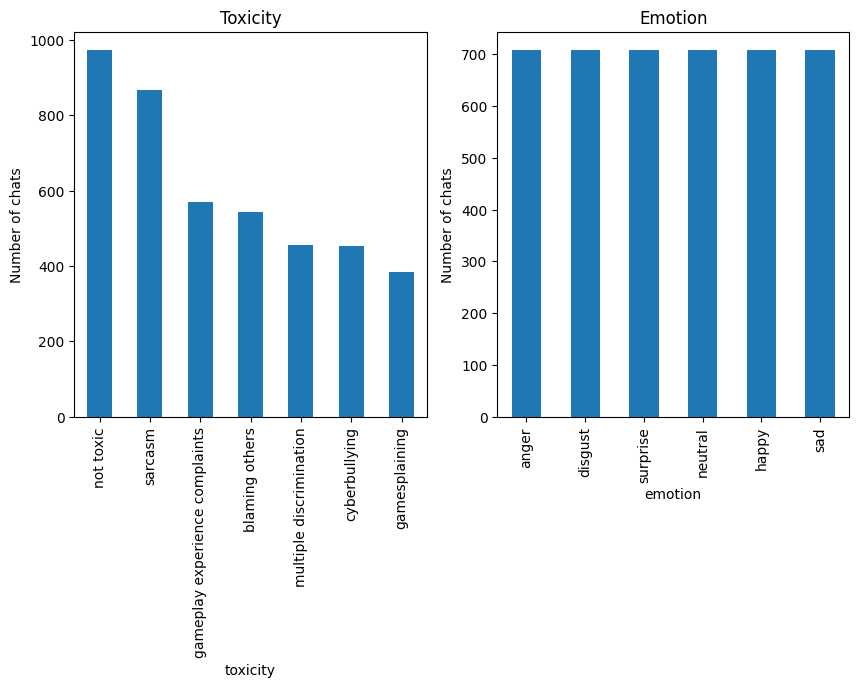

In [78]:
fig = plt.figure(figsize=(10,5))
# Value counts of toxicity
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Toxicity')
ax1.set_xlabel('Toxicity')
ax1.set_ylabel('Number of chats')
over_under_sampled_df['toxicity'].value_counts().plot(kind='bar')


ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Emotion')
ax2.set_xlabel('Emotion')
ax2.set_ylabel('Number of chats')
over_under_sampled_df['emotion'].value_counts().plot(kind='bar')

plt.show()


In [77]:
over_under_sampled_df = over_under_sampled_df.sample(frac=1)
over_under_sampled_df= over_under_sampled_df.reset_index(drop=True)

In [74]:
over_under_sampled_df.to_pickle('../dataset/preprocessed_df_combined.pkl')